In [52]:
%pylab inline
import pandas as pd
import numpy as np

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")


df1 = pd.read_csv('data/n1scores2018-12-22T1944.csv')
df5 = pd.read_csv('data/n5scores2018-12-22T1944.csv')
df20 = pd.read_csv('data/n20scores2018-12-22T1944.csv')


Populating the interactive namespace from numpy and matplotlib


In [80]:
df1 = df1.replace(-1.00, np.nan)
df1 = df1.sort_values(by=['block_number']) 

df5 = df5.replace(-1.00, np.nan)
df5 = df5.sort_values(by=['block_number']) 

df20 = df20.replace(-1.00, np.nan)
df20 = df20.sort_values(by=['block_number']) 

def stats(df):
    df['priceGwei'] = df['price'].apply(lambda x: x/1e9)
    avg_percentage1 = df["percentagePlus1"].mean()
    avg_gasprice = df["priceGwei"].mean()
    std_percentage1 = df["percentagePlus1"].std()
    std_gasprice = df["priceGwei"].std()
    min_gasprice = df["priceGwei"].min()
    max_gasprice = df["priceGwei"].max()
    print("min price: " + str(min_gasprice))
    print("max price: " + str(max_gasprice))
    print("The average gas price is: " + str(avg_gasprice) + " GWei. std: " + str(std_gasprice))
    print("On average " +  str(avg_percentage1) +"% of the transactions of the next block had a higher gas price. std: " + str(std_percentage1))

print("\n############### n=1 ###################")
stats(df1)
print("\n############### n=5 ###################")
stats(df5)
print("\n############### n=20 ###################")
stats(df20)



############### n=1 ###################
min price: 1.501
max price: 80.0
The average gas price is: 6.376006683124717 GWei. std: 7.253958806912546
On average 34.29535947712418% of the transactions of the next block had a higher gas price. std: 33.551049482032035

############### n=5 ###################
min price: 1.425282
max price: 10.0
The average gas price is: 3.593472794871308 GWei. std: 2.255499724489426
On average 27.25537280701754% of the transactions of the next block had a higher gas price. std: 27.339684071609803

############### n=20 ###################
min price: 2.3
max price: 10.0
The average gas price is: 3.6322177424643627 GWei. std: 1.3794457140658656
On average 30.36047191011236% of the transactions of the next block had a higher gas price. std: 27.29154080574371


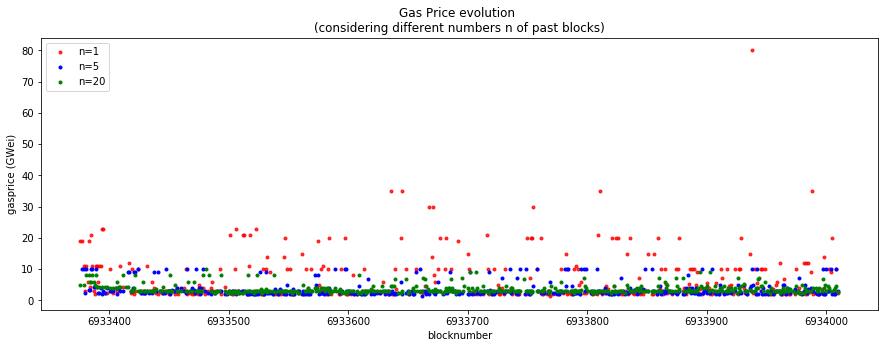

In [83]:
import matplotlib.pyplot as plt

x1 = df1["block_number"].values
y1 = df1["priceGwei"].values

x2 = df5["block_number"].values
y2 = df5["priceGwei"].values

x3 = df20["block_number"].values
y3 = df20["priceGwei"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(x1, y1, alpha=0.8, c='r', marker='.', label='n=1')
ax.scatter(x2,y2, c='b', marker='.', label='n=5')
ax.scatter(x3,y3, c='g',marker='.', label='n=20')

plt.xlabel('blocknumber')
plt.ylabel('gasprice (GWei)')
plt.title('Gas Price evolution \n(considering different numbers n of past blocks)')
plt.legend(loc=2)

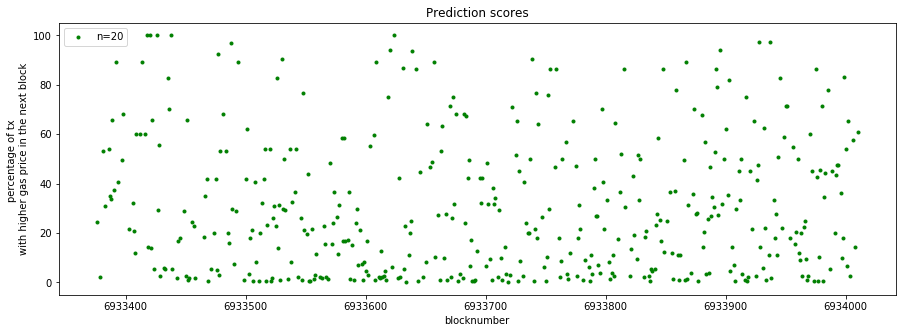

In [88]:
import matplotlib.pyplot as plt

x1 = df1["block_number"].values
y1 = df1["percentagePlus1"].values

x2 = df5["block_number"].values
y2 = df5["percentagePlus1"].values

x3 = df20["block_number"].values
y3 = df20["percentagePlus1"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

#ax.scatter(x1, y1, alpha=0.8, c='r', marker='.', label='n=1')
#ax.scatter(x2,y2, c='b', marker='.', label='n=5')
ax.scatter(x3,y3, c='g',marker='.', label='n=20')

plt.xlabel('blocknumber')
plt.ylabel('percentage of tx \nwith higher gas price in the next block')
plt.title('Prediction scores')
plt.legend(loc=2)